Exploring and Visualizing Data

In [1]:
import nltk

In [2]:
# Importar los datos de entrenamiento
from nltk.corpus import movie_reviews

In [3]:
corpus_words = movie_reviews.words()
print(len(corpus_words))
print(corpus_words)

1583820
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


Palabras comunes: [('the', 76529), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ('is', 25195), ('in', 21822), ('s', 18513), ('it', 16107), ('that', 15924), ('as', 11378), ('with', 10792), ('for', 9961), ('his', 9587), ('this', 9578), ('film', 9517), ('i', 8889), ('he', 8864), ('but', 8634), ('on', 7385), ('are', 6949), ('t', 6410), ('by', 6261), ('be', 6174), ('one', 5852), ('movie', 5771), ('an', 5744), ('who', 5692), ('not', 5577), ('you', 5316), ('from', 4999), ('at', 4986), ('was', 4940), ('have', 4901), ('they', 4825), ('has', 4719), ('her', 4522), ('all', 4373), ('there', 3770), ('like', 3690), ('so', 3683), ('out', 3637), ('about', 3523), ('up', 3405), ('more', 3347), ('what', 3322), ('when', 3258), ('which', 3161), ('or', 3148), ('she', 3141)]


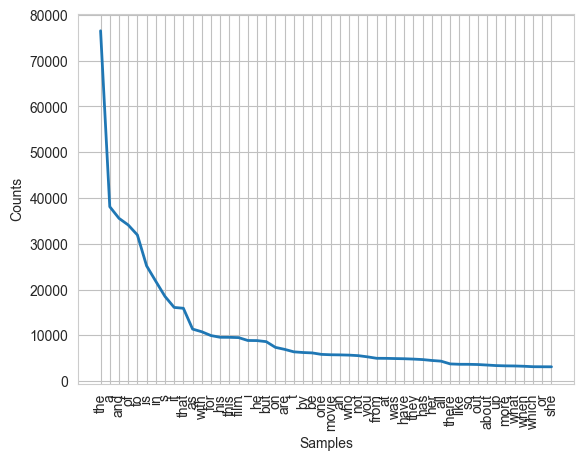

<Axes: xlabel='Samples', ylabel='Counts'>

In [4]:
# Limpieza de datos
words_no_punct = []
for word in corpus_words:
    if word.isalnum():
        words_no_punct.append(word)
freq = nltk.FreqDist(words_no_punct)

# Palabras comunes
print("Palabras comunes:", freq.most_common(50))

# Gráfico de las palabras más comunes
freq.plot(50, cumulative=False)

In [5]:
import nltk
from nltk.corpus import stopwords

stop_words = list(set(stopwords.words('english')))
print(len(stop_words))
print(stop_words[0:50])

179
['be', 'you', 'their', 'ma', 'hers', 'here', 'been', 'again', 'now', 'its', 'needn', 'just', 'for', 'itself', 'by', 'and', 'how', "should've", "doesn't", 'up', 'isn', 'from', "needn't", 'because', 'an', 'hadn', 'himself', 'will', 'weren', "didn't", 'yourselves', "haven't", 'being', 'wouldn', "you're", "aren't", 'themselves', 'during', 'did', 'her', 'myself', 'under', "wouldn't", 'doing', 'couldn', 'll', 'some', 'mustn', "wasn't", 'more']


Palabras mas comunes (Sin las stopwords): [('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049), ('character', 2020), ('also', 1967), ('get', 1949), ('two', 1911), ('well', 1906), ('characters', 1859), ('first', 1836), ('see', 1749), ('way', 1693), ('make', 1642), ('life', 1586), ('really', 1558), ('films', 1536), ('plot', 1513), ('little', 1501), ('people', 1455), ('could', 1427), ('scene', 1397), ('man', 1396), ('bad', 1395), ('never', 1374), ('best', 1333), ('new', 1292), ('scenes', 1274), ('many', 1268), ('director', 1237), ('know', 1217), ('movies', 1206), ('action', 1172), ('great', 1148), ('another', 1121), ('love', 1119), ('go', 1113), ('made', 1084), ('us', 1073), ('big', 1064), ('end', 1062), ('something', 1061), ('back', 1060), ('still', 1047)]


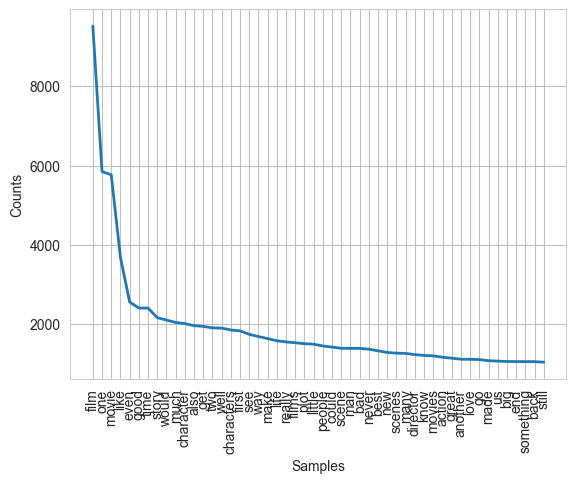

<Axes: xlabel='Samples', ylabel='Counts'>

In [6]:
# Removemos los stopwords de words_no_punct
words_stop = [word for word in words_no_punct if word not in stop_words]

# Calculamos la distribuicion de frecuencia de words_stop
freq_without_stopwords = nltk.FreqDist(words_stop)

# Imprimimos listado de las palabras mas comunes
print("Palabras mas comunes (Sin las stopwords):", freq_without_stopwords.most_common(50))

# Gráfico de las palabras más comunes (sin las stopwods)
freq_without_stopwords.plot(50, cumulative=False)

In [7]:
languages = stopwords.fileids()
print('Stopwords para ', len(languages), ' idiomas son incluidos en NLTK')
print(languages)

Stopwords para  29  idiomas son incluidos en NLTK
['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [8]:
words_stop = [w for w in words_no_punct if not w in stop_words]

Visualizing data with Matplotlib, Seaborn, and pandas

In [9]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
freq_without_stopwords = nltk.FreqDist(words_stop)
frequency_cutoff = 25
all_fdist = freq_without_stopwords.most_common(frequency_cutoff)

Looking at another frequency visualization technique – word clouds

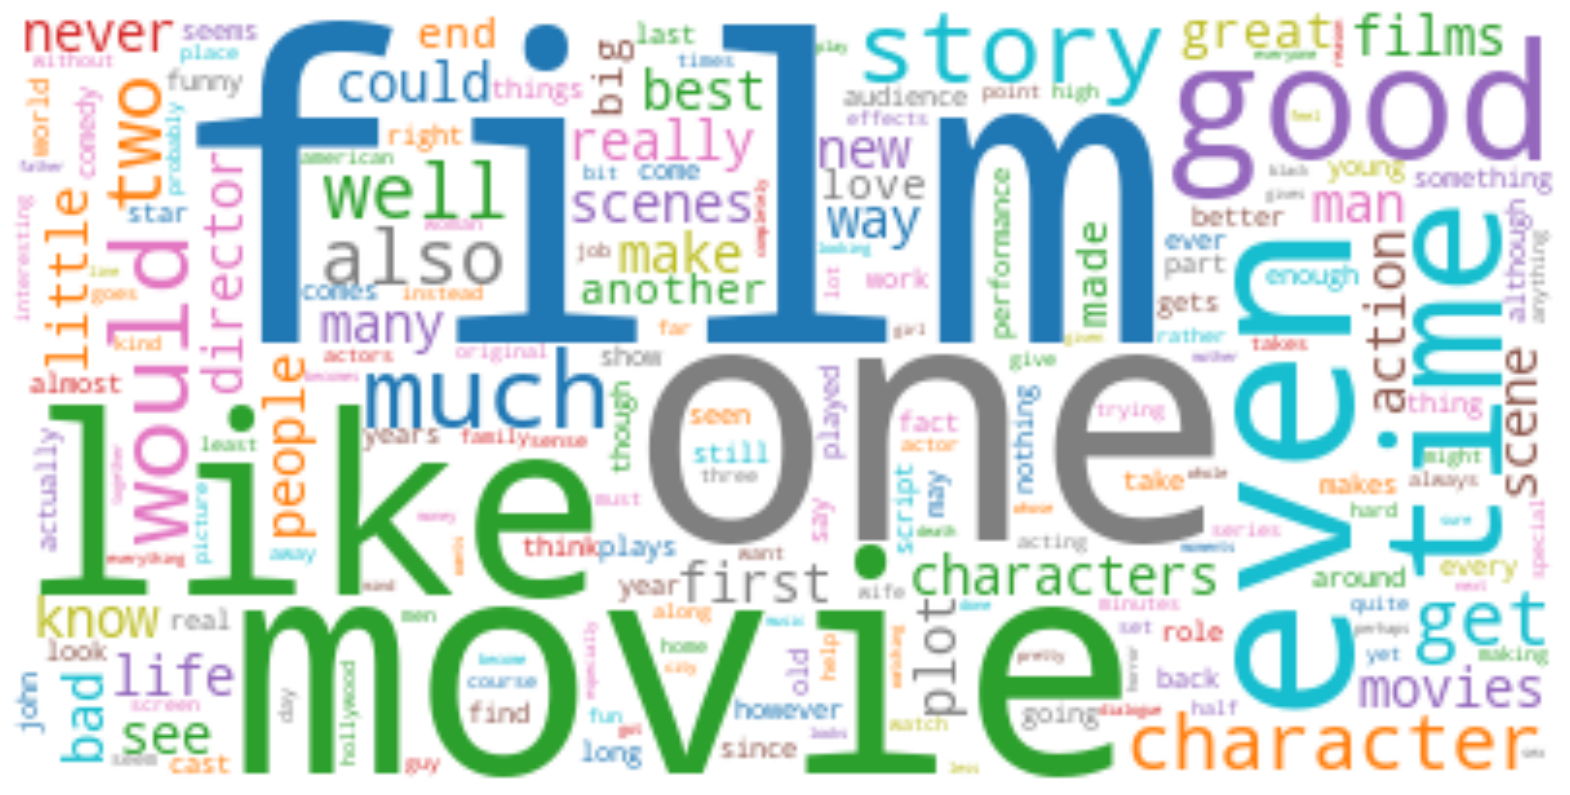

In [11]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

frequency_cutoff = 200
all_fdist = nltk.FreqDist(freq_without_stopwords).most_common(frequency_cutoff)
all_fdist_dict = pd.Series(dict(all_fdist))

long_words = dict([(m, n )for m, n in all_fdist if len(m) > 2])
wordcloud = WordCloud(colormap="tab10", background_color="white").generate_from_frequencies(long_words)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Positive versus negative movie reviews

In [12]:
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
# Remover la puntación y las stopwords
def clean_corpus(corpus):
    cleaned_corpus = []
    for word in corpus:
        if word.isalnum() and not word in stop_words:
            cleaned_corpus.append(word)
    return cleaned_corpus

# Mostrar las palabras más comunes, obtener la frecuencia de las palabras y graficar
def plot_freq_dist(freq_dist):
    frequency_cutoff = 50
    long_words = dict([(m, n) for m, n in freq_dist.items() if len(m) > 2])
    
    wordcloud = WordCloud(colormap="tab10", background_color="white").generate_from_frequencies(long_words)
    
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

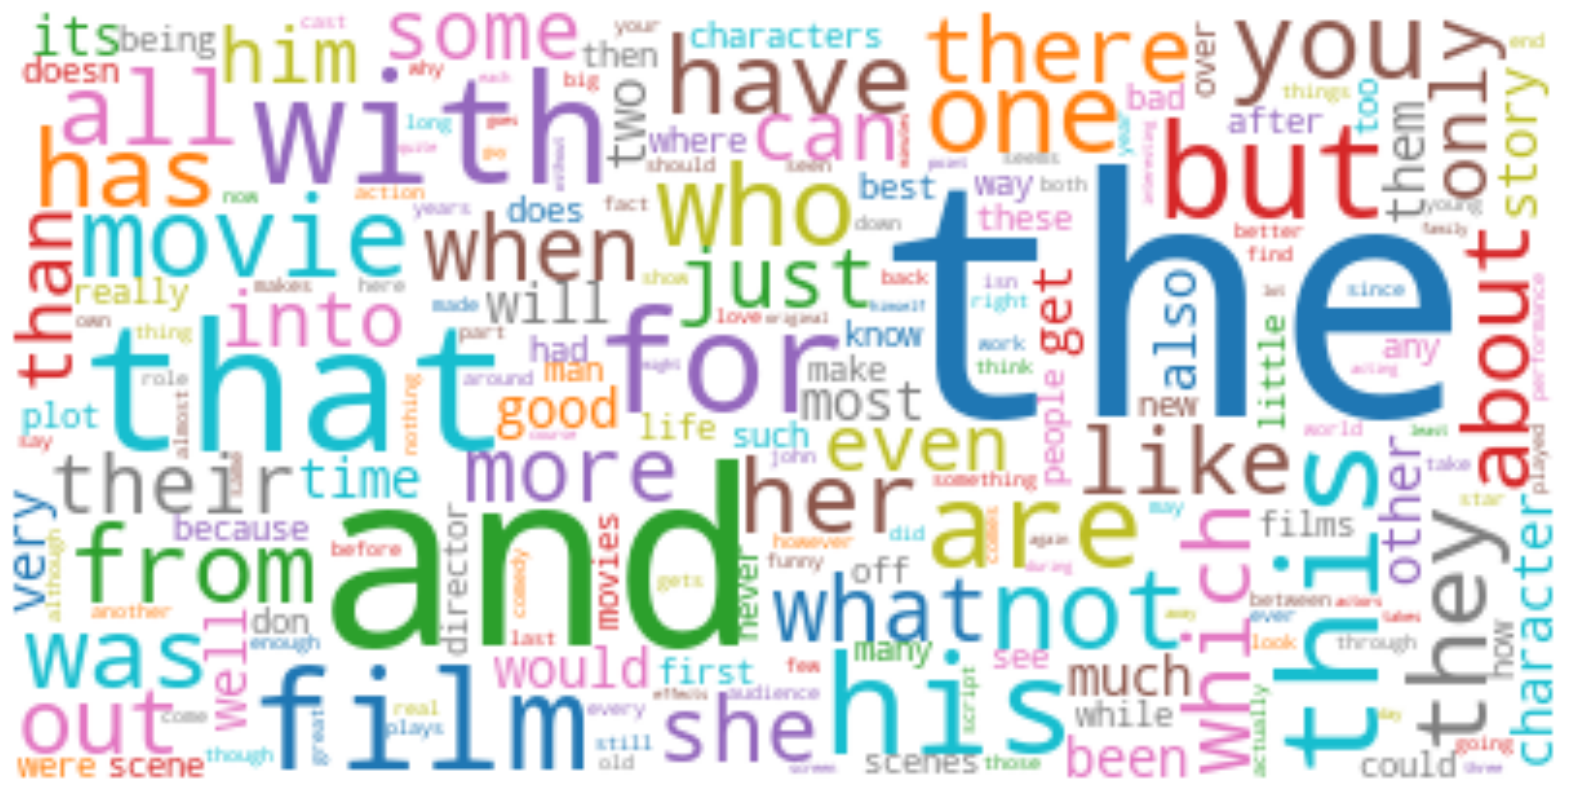

In [14]:
plot_freq_dist(freq)

In [15]:
stop_words = list(set(stopwords.words('english')))
corpus_neg_words = movie_reviews.words(categories=['neg'])
corpus_pos_words = movie_reviews.words(categories=['pos'])

negative_words = clean_corpus(corpus_neg_words)
positive_words = clean_corpus(corpus_pos_words)

neg_freq = nltk.FreqDist(negative_words)
pos_freq = nltk.FreqDist(positive_words)

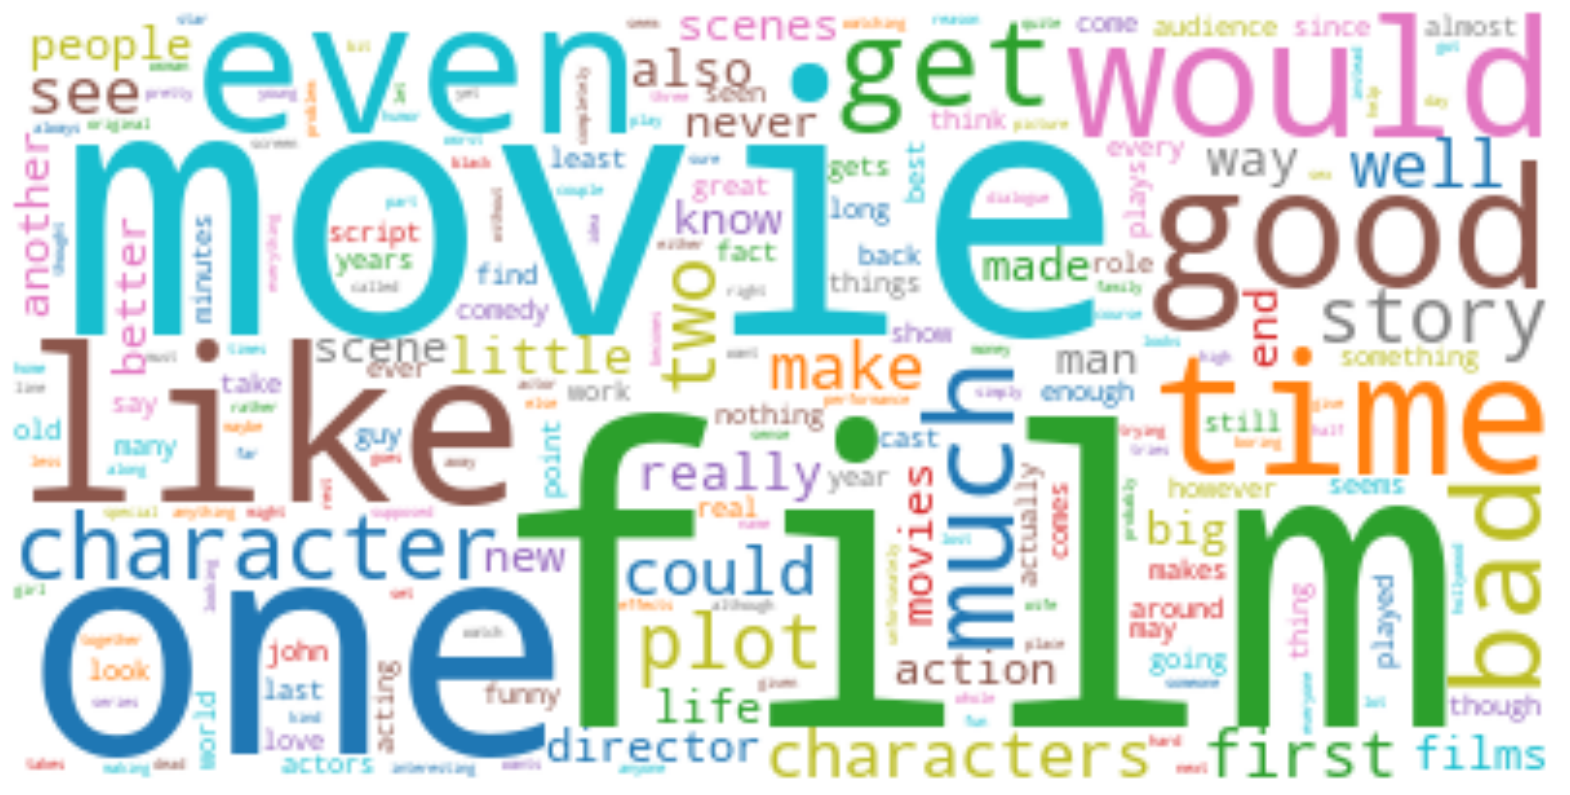

In [16]:
plot_freq_dist(neg_freq)

Looking at other frequency measures

In [17]:
import nltk
from nltk.util import ngrams
from nltk.corpus import movie_reviews

frequency_cutoff = 25

# colectar las palabras del corpus
corpus_words = movie_reviews.words()

# Remover la puntación y las stopwords
clean_corpus = clean_corpus(corpus_words)

<h2 center>Visualizing data with Matplotlib, Seaborn, and pandas</h2>

C:\Users\theso\AppData\Local\Temp\ipykernel_36500\2516922272.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_fdist_dict.index, y=all_fdist_dict.values, palette=colors)


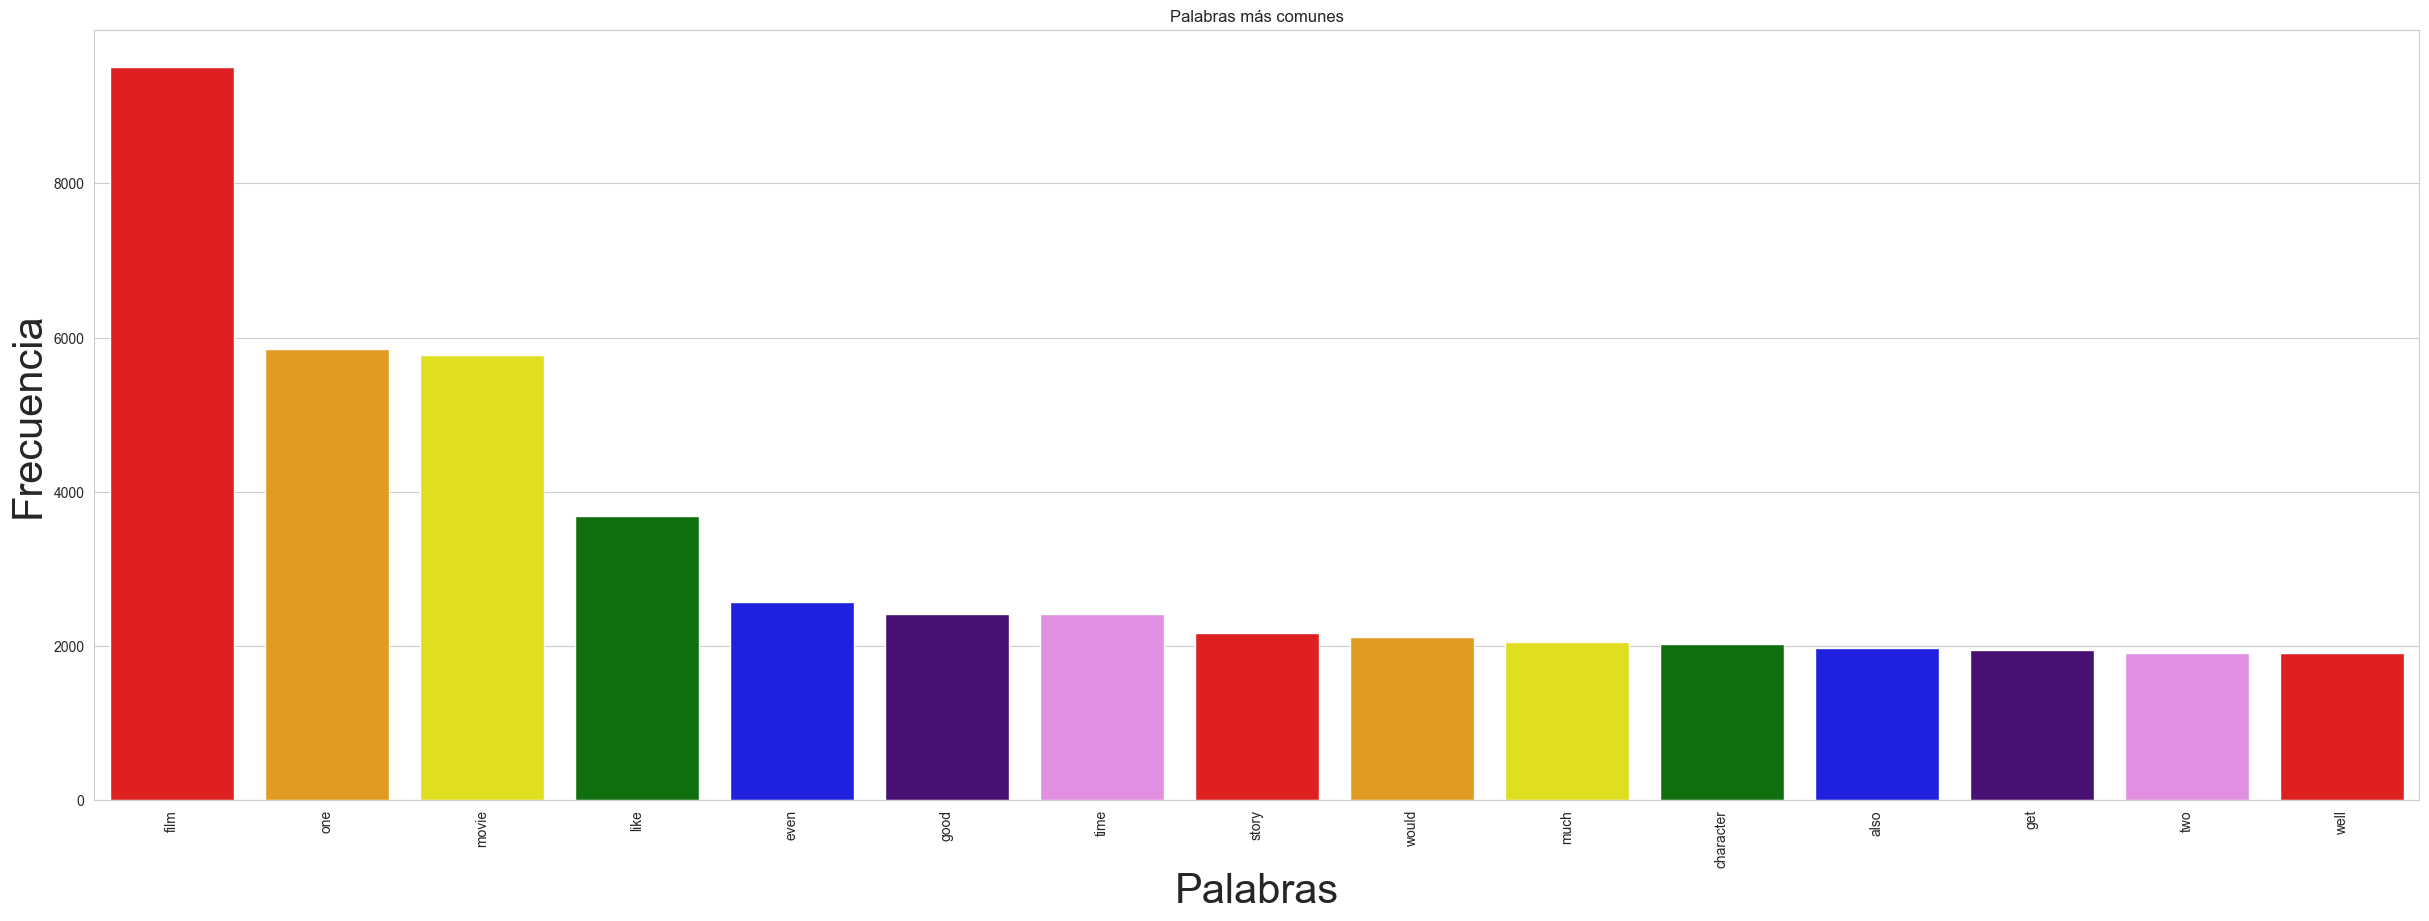

In [34]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

frequency_cutoff = 15
all_fdist = nltk.FreqDist(freq_without_stopwords).most_common(frequency_cutoff)
all_fdist_dict = pd.Series(dict(all_fdist))

# Definir los colores del arco iris
rainbow_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# Repetir los colores del arco iris para que coincidan con el número de barras
colors = rainbow_colors * (len(all_fdist_dict.index) // len(rainbow_colors)) + rainbow_colors[:len(all_fdist_dict.index) % len(rainbow_colors)]

plt.figure(figsize=(30, 10))  # Aumenta el tamaño de la figura
sns.barplot(x=all_fdist_dict.index, y=all_fdist_dict.values, palette=colors)
plt.title('Palabras más comunes')
plt.ylabel('Frecuencia', fontsize=30)
plt.xlabel('Palabras', fontsize=30)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x
plt.show()